In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import re, os, string


In [83]:
train = pd.read_csv("../dataset/train_cleaned.csv")
test = pd.read_csv("../dataset/test_cleaned.csv")


In [4]:
a = train.clean_text_lem.sum()
b = test.clean_text_lem.sum()
c = a+b
cleaned_text_lem = c.translate(str.maketrans('','',string.punctuation))
words = word_tokenize(cleaned_text_lem)

frequency_lem = {}
for word in words:
    count = frequency_lem.get(word,0)
    frequency_lem[word] = count + 1

frequency_list_lem = frequency_lem.keys()    



In [5]:
train.columns    

Index(['Unnamed: 0', 'id', 'original_text', 'retweet_count', 'original_author',
       'sentiment_class', 'new_text', 'clean_text', 'clean_text_stem',
       'clean_text_lem', 'cnt_words', 'ttl_wrds', 'clean_text_polarity',
       'original_text_polarity', 'clean_text_lem_polarity',
       'clean_text_stem_polarity', 'clean_text_subj', 'original_text_subj',
       'clean_text_lem_subj', 'clean_text_stem_subj'],
      dtype='object')

In [23]:
cols0 = ['retweet_count', 'original_author',
       'sentiment_class', 'cnt_words', 'ttl_wrds', 'clean_text_polarity',
       'original_text_polarity', 'clean_text_lem_polarity',
       'clean_text_stem_polarity', 'clean_text_subj', 'original_text_subj',
       'clean_text_lem_subj', 'clean_text_stem_subj']

retweet_count


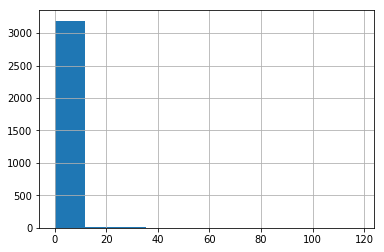

In [24]:
i=0
print(cols0[i])
train[cols0[i]].hist()

original_author


KeyboardInterrupt: 

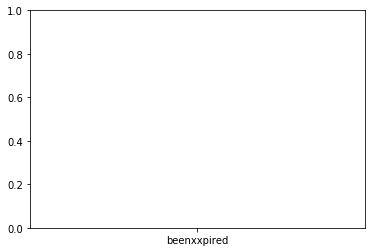

In [25]:
i=1
print(cols0[i])
train[cols0[i]].hist()

sentiment_class


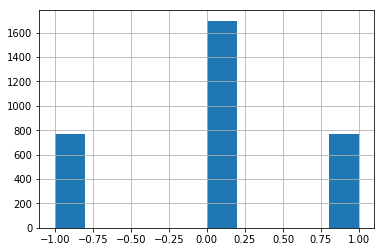

In [26]:
i=2
print(cols0[i])
train[cols0[i]].hist()

cnt_words


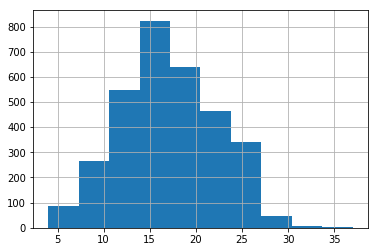

In [27]:
i=3
print(cols0[i])
train[cols0[i]].hist()

ttl_wrds


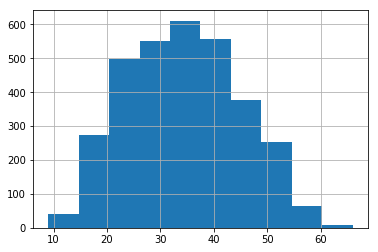

In [29]:
i=4
print(cols0[i])
train[cols0[i]].hist()

clean_text_polarity


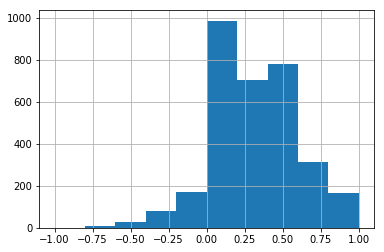

In [30]:
i=5
print(cols0[i])
train[cols0[i]].hist()

original_text_polarity


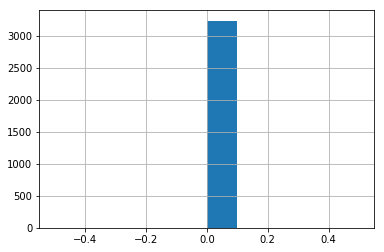

In [31]:
i=6
print(cols0[i])
train[cols0[i]].hist()

clean_text_lem_polarity


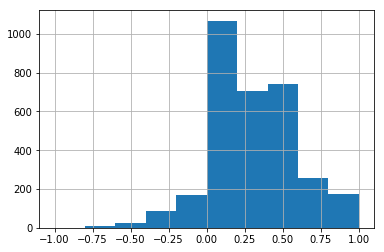

In [32]:
i=7
print(cols0[i])
train[cols0[i]].hist()

clean_text_stem_polarity


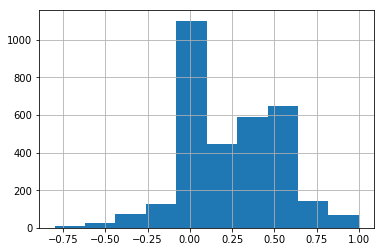

In [33]:
i=8
print(cols0[i])
train[cols0[i]].hist()

clean_text_subj


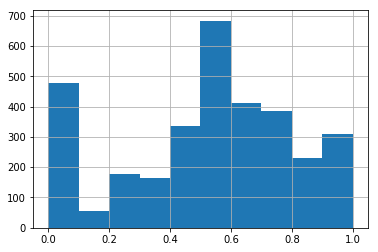

In [34]:
i=9
print(cols0[i])
train[cols0[i]].hist()

original_text_subj


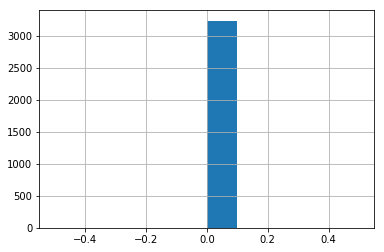

In [35]:
i=10
print(cols0[i])
train[cols0[i]].hist()

clean_text_lem_subj


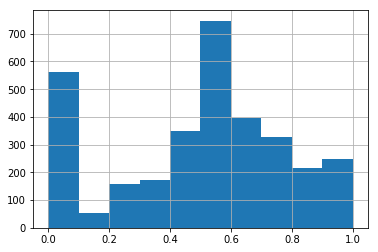

In [36]:
i=11
print(cols0[i])
train[cols0[i]].hist()

clean_text_stem_subj


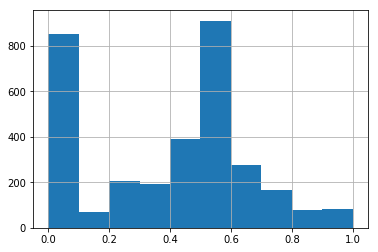

In [37]:
i=12
print(cols0[i])
train[cols0[i]].hist()

In [38]:
pd.pivot_table(train, index = 'sentiment_class', values = 'clean_text_lem_polarity')

,clean_text_lem_polarity
sentiment_class,
-1,0.281649
0,0.277662
1,0.295829


In [39]:
pd.pivot_table(train, index = 'sentiment_class', values = 'clean_text_lem_subj')

,clean_text_lem_subj
sentiment_class,
-1,0.507617
0,0.490918
1,0.498999


In [42]:
print(pd.pivot_table(train, index = 'sentiment_class', values = 'clean_text_stem_polarity'))
print(pd.pivot_table(train, index = 'sentiment_class', values = 'clean_text_stem_subj'))

                 clean_text_stem_polarity
sentiment_class                          
-1                               0.234164
 0                               0.227376
 1                               0.241737
                 clean_text_stem_subj
sentiment_class                      
-1                           0.399270
 0                           0.390637
 1                           0.388704


In [53]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_stem_subj','clean_text_stem_polarity','cnt_words'], aggfunc = 'sum')

,clean_text_stem_polarity,clean_text_stem_subj,cnt_words
sentiment_class,,,
-1,180.072424,307.038347,13060
0,385.857740,662.911643,29012
1,184.928744,297.358354,13118


In [54]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_lem_subj','clean_text_lem_polarity','cnt_words'], aggfunc = 'sum')

,clean_text_lem_polarity,clean_text_lem_subj,cnt_words
sentiment_class,,,
-1,216.588452,390.357811,13060
0,471.191849,833.087619,29012
1,226.308904,381.734225,13118


In [55]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_stem_subj','clean_text_stem_polarity','cnt_words'])

,clean_text_stem_polarity,clean_text_stem_subj,cnt_words
sentiment_class,,,
-1,0.234164,0.399270,16.983095
0,0.227376,0.390637,17.096052
1,0.241737,0.388704,17.147712


In [56]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_lem_subj','clean_text_lem_polarity','cnt_words'])

,clean_text_lem_polarity,clean_text_lem_subj,cnt_words
sentiment_class,,,
-1,0.281649,0.507617,16.983095
0,0.277662,0.490918,17.096052
1,0.295829,0.498999,17.147712


In [57]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_lem_subj','clean_text_lem_polarity','cnt_words'],aggfunc='min')

,clean_text_lem_polarity,clean_text_lem_subj,cnt_words
sentiment_class,,,
-1,-0.8,0.0,4
0,-0.8,0.0,4
1,-1.0,0.0,5


In [58]:
pd.pivot_table(train, index = ['sentiment_class'], values = ['clean_text_lem_subj','clean_text_lem_polarity','cnt_words'],aggfunc='max')

,clean_text_lem_polarity,clean_text_lem_subj,cnt_words
sentiment_class,,,
-1,1.0,1.0,37
0,1.0,1.0,37
1,1.0,1.0,34


In [60]:

train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','cnt_words','ttl_wrds']].corr()

,sentiment_class,clean_text_lem_subj,clean_text_lem_polarity,cnt_words,ttl_wrds
sentiment_class,1.000000,-0.010231,0.016242,0.010766,0.002553
clean_text_lem_subj,-0.010231,1.000000,0.506291,0.138087,0.209576
clean_text_lem_polarity,0.016242,0.506291,1.000000,-0.036217,-0.009836
cnt_words,0.010766,0.138087,-0.036217,1.000000,0.828902
ttl_wrds,0.002553,0.209576,-0.009836,0.828902,1.000000


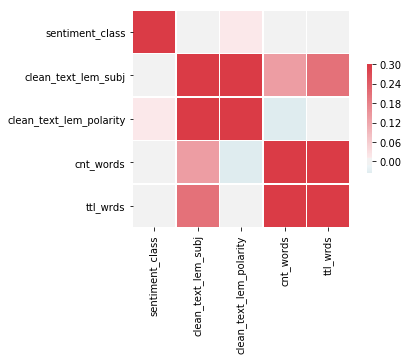

In [62]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','cnt_words','ttl_wrds']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

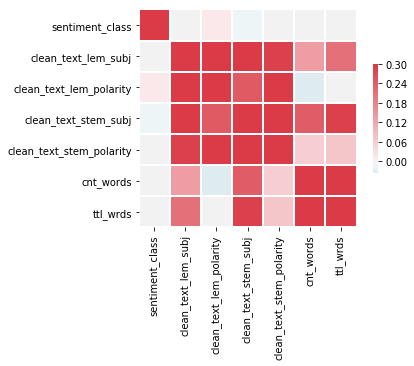

In [63]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','clean_text_stem_subj','clean_text_stem_polarity','cnt_words','ttl_wrds']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

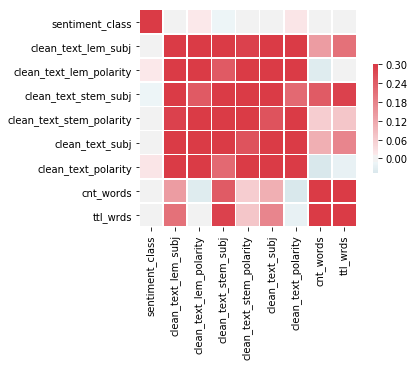

In [64]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','clean_text_stem_subj','clean_text_stem_polarity','clean_text_subj','clean_text_polarity','cnt_words','ttl_wrds']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

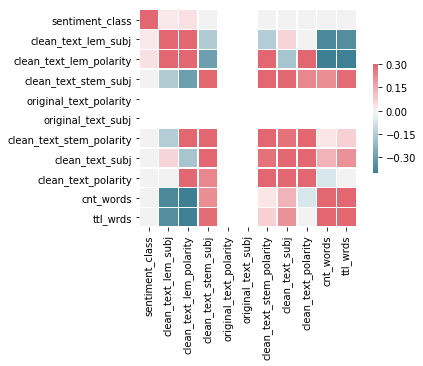

In [84]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','clean_text_stem_subj','original_text_polarity','original_text_subj','clean_text_stem_polarity','clean_text_subj','clean_text_polarity','cnt_words','ttl_wrds']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

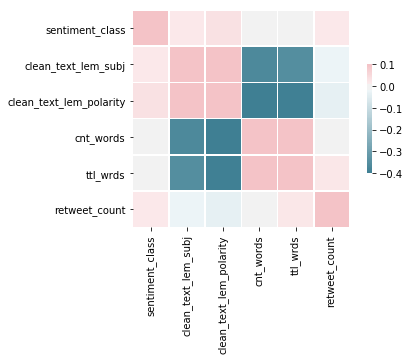

In [85]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_lem_subj','clean_text_lem_polarity','cnt_words','ttl_wrds','retweet_count','original_author']].corr(),vmax=.1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

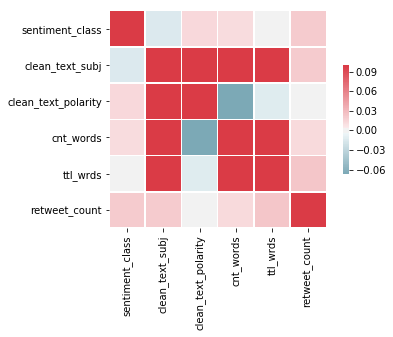

In [87]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[['sentiment_class','clean_text_subj','clean_text_polarity','cnt_words','ttl_wrds','retweet_count','original_author']].corr(),vmax=.1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [86]:
train[['sentiment_class','clean_text_subj','clean_text_polarity','cnt_words','ttl_wrds','retweet_count','original_author']].corr()

,sentiment_class,clean_text_subj,clean_text_polarity,cnt_words,ttl_wrds,retweet_count
sentiment_class,1.000000,-0.013357,0.013779,0.011787,0.002553,0.020431
clean_text_subj,-0.013357,1.000000,0.512414,0.134606,0.205588,0.020420
clean_text_polarity,0.013779,0.512414,1.000000,-0.066257,-0.011769,-0.000905
cnt_words,0.011787,0.134606,-0.066257,1.000000,0.785365,0.012715
ttl_wrds,0.002553,0.205588,-0.011769,0.785365,1.000000,0.023861
retweet_count,0.020431,0.020420,-0.000905,0.012715,0.023861,1.000000


In [66]:
train.columns


Index(['Unnamed: 0', 'id', 'original_text', 'retweet_count', 'original_author',
       'sentiment_class', 'new_text', 'clean_text', 'clean_text_stem',
       'clean_text_lem', 'cnt_words', 'ttl_wrds', 'clean_text_polarity',
       'original_text_polarity', 'clean_text_lem_polarity',
       'clean_text_stem_polarity', 'clean_text_subj', 'original_text_subj',
       'clean_text_lem_subj', 'clean_text_stem_subj'],
      dtype='object')

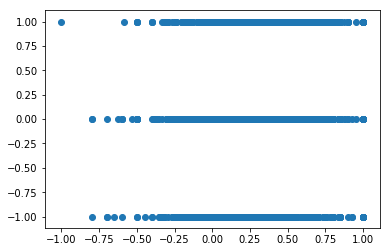

In [88]:
plt.scatter(train['clean_text_polarity'],train['sentiment_class'])

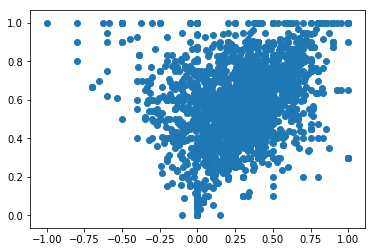

In [80]:
plt.scatter(train['clean_text_lem_polarity'],train['clean_text_lem_subj'])

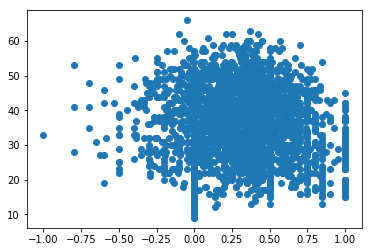

In [81]:
plt.scatter(train['clean_text_lem_polarity'],train['ttl_wrds'])

In [82]:
train.clean_text_lem


0       ['mothersday', 'amaze', 'mother', 'know', 'har...
1       ['mother', 'day', 'mum', 'sorry', 'cant', 'bri...
2       ['mother', 'day', 'mother', 'day', 'work', 'to...
3       ['mother', 'day', 'beautiful', 'womanroyalty',...
4       ['remember', 'amaze', 'lady', 'make', 'late', ...
5       ['mother', 'day', 'bratz', 'world', 'familiez'...
6       ['mother', 'day', 'wonderful', 'mum', 'mothers...
7       ['show', 'mother', 'two', 'sey', 'rosie', 'mot...
8       ['mother', 'grandmother', 'aunt', 'sister', 'w...
9       ['mother', 'around', 'world', 'gas', 'health',...
10      ['mother', 'day', 'mother', 'around', 'word', ...
11      ['mother', 'day', 'christine', 'daily', 'life'...
12      ['mother', 'day', 'check', 'latest', 'blog', '...
13      ['mother', 'day', 'everyone', 'tune', 'th', 'r...
14      ['mother', 'day', 'get', 'playdoh', 'worm', 'c...
15      ['mother', 'day', 'amaze', 'mum', 'keep', 'awe...
16      ['poem', 'write', 'wife', 'mother', 'day', 'mo...
17      ['moth